# Capstone 3
## Full Project

Steps:
- created a new folder called Capstone3
- copied the project structure into that folder
- created a new notebook called Capstone3v1 in the notebooks section
- downloaded dataset from: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo
- unzipped it and placed it in the data section under external
- started by importing packages [Imports](#imports)
- created important info section [Important Info](#importantinfo)
- loaded the data into variable df
- looked at head
- looked at shape
- looked at info
- [cohort analysis](#ca)

Imports<a id='imports'></a>

In [1]:
#import packages 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Important Info<a id='importantinfo'></a>

In [2]:
#Index Link: [Important Info](#importantinfo)
#Section Link <a id='imports'></a>
downloaded_dataset='../data/external/Online Retail.xlsx'
df=pd.read_excel(downloaded_dataset)

In [3]:
df.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
217932,555946,21238,RED RETROSPOT CUP,3,2011-06-08 10:43:00,0.85,17238.0,United Kingdom
226237,556784,20707,CRAZY DAISY HEART DECORATION,2,2011-06-14 13:15:00,1.25,14461.0,United Kingdom
262708,559923,82551,LAUNDRY 15C METAL SIGN,1,2011-07-13 16:07:00,2.46,NaN,United Kingdom
279306,561259,21533,RETROSPOT LARGE MILK JUG,3,2011-07-26 12:04:00,4.95,12584.0,Italy
224140,556507,23054,RECYCLED ACAPULCO MAT LAVENDER,4,2011-06-13 09:55:00,8.25,12567.0,France
375340,569460,22457,NATURAL SLATE HEART CHALKBOARD,6,2011-10-04 11:33:00,2.95,13895.0,United Kingdom
329935,565859,21175,GIN + TONIC DIET METAL SIGN,12,2011-09-07 14:40:00,2.55,16818.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Cohort Analysis <a id='ca'></a>

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
df['InvoiceMonth']=df['InvoiceDate'].apply(get_month)
grouping=df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth']=grouping.transform('min')

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [9]:
df[['CustomerID','InvoiceMonth','CohortMonth']].sample(15)

,CustomerID,InvoiceMonth,CohortMonth
386578,16518.0,2011-10-01,2011-02-01
335426,14057.0,2011-09-01,2010-12-01
26224,15547.0,2010-12-01,2010-12-01
250923,NaN,2011-07-01,NaT
6819,14723.0,2010-12-01,2010-12-01
453235,NaN,2011-11-01,NaT
136182,13901.0,2011-03-01,2011-01-01
536969,13436.0,2011-12-01,2011-12-01
291501,15194.0,2011-08-01,2010-12-01
205550,15622.0,2011-05-01,2011-03-01


In [10]:
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day

In [11]:
invoice_year, invoice_month, _ = get_date_int(df,'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df,'CohortMonth')

In [12]:
invoice_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceMonth, Length: 541909, dtype: int64

In [13]:
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month

In [14]:
years_diff

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
541904    0.0
541905    0.0
541906    0.0
541907    0.0
541908    0.0
Length: 541909, dtype: float64

In [15]:
months_diff

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
541904    4.0
541905    4.0
541906    4.0
541907    4.0
541908    4.0
Length: 541909, dtype: float64

In [16]:
df['CohortIndex']=years_diff * 12 + months_diff + 1

In [17]:
df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
411423,572217,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-10-21 13:03:00,4.95,15311.0,United Kingdom,2011-10-01,2010-12-01,11.0
200934,554163,22176,BLUE OWL SOFT TOY,1,2011-05-23 11:52:00,2.95,14573.0,United Kingdom,2011-05-01,2010-12-01,6.0
151488,549556,22521,CHILDS GARDEN TROWEL PINK,3,2011-04-10 12:53:00,0.85,17372.0,United Kingdom,2011-04-01,2010-12-01,5.0
329874,565857,21874,GIN AND TONIC MUG,12,2011-09-07 14:13:00,1.65,14911.0,EIRE,2011-09-01,2010-12-01,10.0
451786,575256,21914,BLUE HARMONICA IN BOX,24,2011-11-09 11:58:00,1.25,13408.0,United Kingdom,2011-11-01,2010-12-01,12.0
280581,561471,22960,JAM MAKING SET WITH JARS,12,2011-07-27 13:14:00,3.75,14911.0,EIRE,2011-07-01,2010-12-01,8.0
375716,569474,23234,BISCUIT TIN VINTAGE CHRISTMAS,6,2011-10-04 12:39:00,2.89,14178.0,United Kingdom,2011-10-01,2011-06-01,5.0
256093,559441,POST,POSTAGE,2,2011-07-08 12:22:00,18.00,12583.0,France,2011-07-01,2010-12-01,8.0
50790,C540555,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,2011-01-10 09:56:00,7.95,16279.0,United Kingdom,2011-01-01,2011-01-01,1.0
35741,539437,21640,ASSORTED TUTTI FRUTTI FOB NOTEBOOK,1,2010-12-17 14:54:00,1.66,NaN,United Kingdom,2010-12-01,NaT,NaN


In [18]:
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['CustomerID'].apply(pd.Series.nunique)

In [19]:
cohort_data.head()

CohortMonth  CohortIndex
2010-12-01   1.0            948
             2.0            362
             3.0            317
             4.0            367
             5.0            341
Name: CustomerID, dtype: int64

In [20]:
cohort_data= cohort_data.reset_index()

In [21]:
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341


In [22]:
cohort_counts=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [23]:
cohort_counts #pivot table

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Retention Rate

In [24]:
cohort_sizes=cohort_counts.iloc[:,0]
retention=cohort_counts.divide(cohort_sizes,axis=0)

In [25]:
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


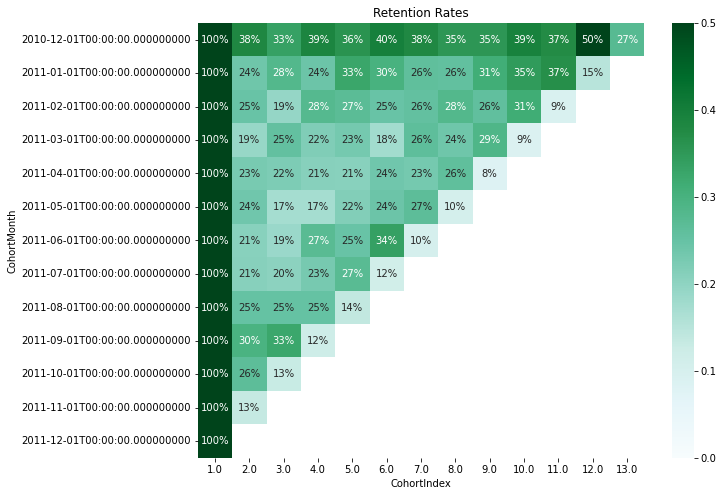

In [27]:
plt.figure(figsize=(10,8))
plt.title('Retention Rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=.5,cmap='BuGn')
plt.show()

# Quantity

In [28]:
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Quantity'].mean()

In [29]:
cohort_data.head()

CohortMonth  CohortIndex
2010-12-01   1.0            11.037691
             2.0            14.603253
             3.0            14.982141
             4.0            14.801090
             5.0            12.943024
Name: Quantity, dtype: float64

In [30]:
cohort_data=cohort_data.reset_index()

In [31]:
cohort_data.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1.0,11.037691
1,2010-12-01,2.0,14.603253
2,2010-12-01,3.0,14.982141
3,2010-12-01,4.0,14.801090
4,2010-12-01,5.0,12.943024


In [32]:
average_quantity=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')

In [33]:
average_quantity.round(2)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.04,14.60,14.98,14.80,12.94,14.32,15.17,14.76,16.66,16.69,17.26,12.82,14.78
2011-01-01,10.02,12.57,12.34,10.94,12.23,14.90,14.23,14.39,11.40,9.88,9.09,9.54,NaN
2011-02-01,10.83,12.08,18.56,11.96,11.12,11.41,13.35,12.38,10.27,11.95,12.65,NaN,NaN
2011-03-01,9.76,9.92,12.21,9.46,13.58,12.31,13.16,12.18,10.52,8.88,NaN,NaN,NaN
2011-04-01,9.75,10.11,9.42,11.60,11.49,8.22,9.68,9.29,7.29,NaN,NaN,NaN,NaN
2011-05-01,10.87,9.03,13.88,11.81,10.90,8.67,10.15,7.37,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.33,13.68,10.46,13.28,10.23,9.76,9.26,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.72,12.70,7.14,7.84,6.01,7.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.89,5.96,5.35,5.98,6.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


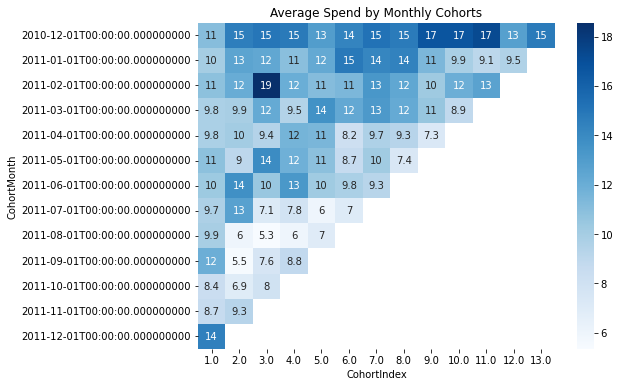

In [34]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()

# Price

In [35]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.2,3.2,3.2,3.6,2.9,5.0,3.2,3.2,3.5,3.0,3.3,2.8,2.8
2011-01-01,3.5,3.7,3.1,8.4,3.2,3.2,2.9,2.7,2.6,5.5,2.9,2.6,NaN
2011-02-01,3.3,4.4,4.8,3.1,3.0,2.8,2.8,3.2,2.9,2.9,3.2,NaN,NaN
2011-03-01,3.3,5.0,3.7,3.3,3.6,2.8,2.8,2.8,2.7,2.5,NaN,NaN,NaN
2011-04-01,3.4,4.0,3.3,2.7,3.0,2.9,2.9,2.8,2.6,NaN,NaN,NaN,NaN
2011-05-01,4.6,3.2,2.6,3.2,2.7,2.5,2.6,2.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.4,3.2,3.3,2.8,2.6,3.5,2.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.5,3.5,2.7,2.7,2.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.0,5.4,5.7,7.0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


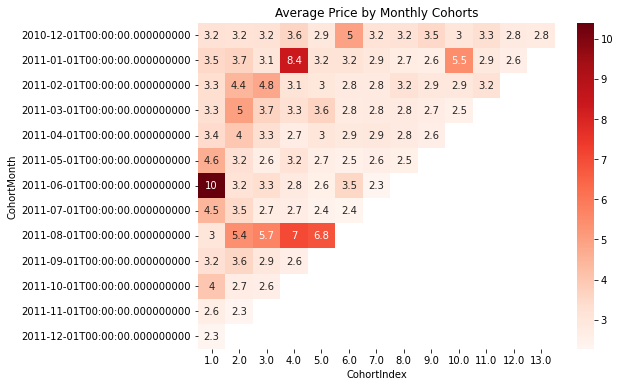

In [36]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Price by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_price, annot=True, cmap='Reds')
plt.show()

# R F M

In [37]:
df1=df
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [38]:
print('Min:{}; Max:{}'.format(min(df.InvoiceDate),max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [39]:
snapshot_date=max(df.InvoiceDate)+dt.timedelta(days=1)

In [40]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [41]:
df1['TotalSum']=df1['UnitPrice']*df1['Quantity']

In [42]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34


In [43]:
df2=df1.groupby(['CustomerID']).agg({'InvoiceDate':lambda x: (snapshot_date-x.max()).days,'InvoiceNo':'count','TotalSum':'sum'})

In [44]:
df2.head

<bound method NDFrame.head of             InvoiceDate  InvoiceNo  TotalSum
CustomerID                                  
12346.0             326          2      0.00
12347.0               2        182   4310.00
12348.0              75         31   1797.24
12349.0              19         73   1757.55
12350.0             310         17    334.40
...                 ...        ...       ...
18280.0             278         10    180.60
18281.0             181          7     80.82
18282.0               8         13    176.60
18283.0               4        756   2094.88
18287.0              43         70   1837.28

[4372 rows x 3 columns]>

In [45]:
df2.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'},inplace=True)

In [46]:
df2

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [47]:
df2['Tenure']=df2['Recency']
df2['Tenure']=df2[{'Tenure':lambda x: (snapshot_date-x.min()).days}]


C:\Users\alw-hp-17\AppData\Local\Temp\ipykernel_21368\819273626.py:2: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df2['Tenure']=df2[{'Tenure':lambda x: (snapshot_date-x.min()).days}]


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4372 non-null   int64  
 1   Frequency      4372 non-null   int64  
 2   MonetaryValue  4372 non-null   float64
 3   Tenure         4372 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 170.8 KB


In [49]:
df2_rfmt=df2[['Recency','Frequency','MonetaryValue','Tenure']]

In [50]:
df2_rfmt

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12346.0,326,2,0.00,326
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,75
12349.0,19,73,1757.55,19
12350.0,310,17,334.40,310
...,...,...,...,...
18280.0,278,10,180.60,278
18281.0,181,7,80.82,181
18282.0,8,13,176.60,8


In [51]:
df2_rfmt = df2_rfmt[df2_rfmt.MonetaryValue != 0.00]

In [52]:
df2_rfmt

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,75
12349.0,19,73,1757.55,19
12350.0,310,17,334.40,310
12352.0,36,95,1545.41,36
...,...,...,...,...
18280.0,278,10,180.60,278
18281.0,181,7,80.82,181
18282.0,8,13,176.60,8


In [53]:
df2_rfmt_log=np.log(df2_rfmt)

D:\Users\alw-hp-17\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [54]:
scaler = StandardScaler()
scaler.fit(df2_rfmt_log)

StandardScaler()

In [55]:
df2_rfmt_log.describe()

,Recency,Frequency,MonetaryValue,Tenure
count,4364.000000,4364.000000,4322.000000,4364.000000
mean,3.731567,3.687951,6.524490,3.731567
std,1.465454,1.338478,1.825378,1.465454
min,0.000000,0.000000,-33.964212,0.000000
25%,2.833213,2.833213,5.711395,2.833213
50%,3.912023,3.737670,6.488521,3.912023
75%,4.962845,4.624973,7.393718,4.962845
max,5.924256,8.985070,12.540718,5.924256


In [56]:
df2_rfmt_normalized=scaler.transform(df2_rfmt_log)

In [57]:
bad_indices=np.where(np.isnan(df2_rfmt_normalized))
df2_rfmt_normalized[bad_indices]=-1

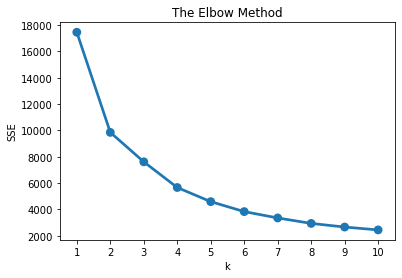

In [58]:
sse={}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df2_rfmt_normalized)
    sse[k] = kmeans.inertia_ 
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [59]:
df2_rfmt_normalized

array([[-2.07360243,  1.13280139,  1.01042983, -2.07360243],
       [ 0.39986786, -0.18976241,  0.53119372,  0.39986786],
       [-0.53718423,  0.45019618,  0.51895848, -0.53718423],
       ...,
       [-1.127511  , -0.83911007, -0.73998893, -1.127511  ],
       [-1.60055671,  2.19684433,  0.61515544, -1.60055671],
       [ 0.02022315,  0.41884041,  0.54326608,  0.02022315]])

In [60]:
df2_rfmt_normalized = pd.DataFrame(data=df2_rfmt_normalized, index=df2_rfmt.index, columns=df2_rfmt.columns)

In [61]:
df2_rfmt_normalized

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12347.0,-2.073602,1.132801,1.010430,-2.073602
12348.0,0.399868,-0.189762,0.531194,0.399868
12349.0,-0.537184,0.450196,0.518958,-0.537184
12350.0,1.368337,-0.638662,-0.390185,1.368337
12352.0,-0.101037,0.647022,0.448482,-0.101037
...,...,...,...,...
18280.0,1.293982,-1.035149,-0.727718,1.293982
18281.0,1.001122,-1.301658,-1.168258,1.001122
18282.0,-1.127511,-0.839110,-0.739989,-1.127511


In [62]:
df2_rfmt_k4

NameError: name 'df2_rfmt_k4' is not defined

In [ ]:
# Melt the normalized dataset and reset the index
df2_melt = pd.melt(df2_rfmt_k4.reset_index(),
                   id_vars=['CustomerID','Cluster'],
                   value_vars=['Recency', 'Frequency', 'MonetaryValue','Tenure'],                                     
                   var_name='Metric', value_name='Value')

In [ ]:
df2_melt

In [ ]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df2_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [ ]:
# Calculate average RFM values for each cluster
cluster_avg = df2_rfmt_k4.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df2_rfmt.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

In [ ]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(df2_rfmt_normalized)
cluster_labels = kmeans.labels_

In [ ]:
df2_rfmt_k4 = df2_rfmt.assign(Cluster=cluster_labels)
grouped=df2_rfmt_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

In [ ]:
df2_rfmt_k4

In [ ]:
r_labels=list(range(4,0,-1))
f_labels=range(1,4)

In [ ]:
r_labels

In [ ]:
recency_quartiles=pd.qcut(athru['Recency'],4,labels=r_labels)
athru['Recency_Quartile']=recency_quartiles
athru.sort_values('Recency_Quartile')

In [ ]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(beta['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(beta['Frequency'], q=3, labels=f_labels)

# Create new columns R and F
beta = beta.assign(R=r_groups.values, F=f_groups.values)

In [ ]:
beta

In [ ]:
# Create labels for MonetaryValue 
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups
m_groups = pd.qcut(beta['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
beta = beta.assign(M=m_groups.values)

# Calculate RFM_Score
beta['RFM_Score'] = beta[['R','F','M']].sum(axis=1)
beta['RFM_Score'].head()

In [ ]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
beta['RFM_Level'] = beta.apply(rfm_level, axis=1)

# Print the header with the top 5 rows to the console.
beta

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = beta.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

# k-means clustering

In [ ]:
sns.distplot(beta['Recency'])
plt.show()

In [ ]:
sns.distplot(beta['Frequency'])
plt.show()

In [ ]:
frequency_log=np.log(beta['Frequency'])

In [ ]:
sns.distplot(frequency_log)
plt.show()

In [ ]:
recency_log=np.log(beta['Recency'])

In [ ]:
sns.distplot(recency_log)
plt.show()

In [ ]:
beta_rfm=beta[['Recency','Frequency','MonetaryValue']]

In [ ]:
beta_rfm.describe()

In [ ]:
beta_centered=beta_rfm-beta_rfm.mean()

In [ ]:
beta_centered.describe().round(2)

In [ ]:
beta_scaled=beta_rfm/beta_rfm.std()

In [ ]:
beta_scaled.describe().round(2)

In [ ]:
scaler=StandardScaler()
scaler.fit(beta_rfm)
beta_normalized=scaler.transform(beta_rfm)

In [ ]:
print('Mean:{}'.format(beta_normalized.mean(axis=0).round(2)))
print('Std:{}'.format(beta_normalized.std(axis=0).round(2)))

In [ ]:
kmeans=KMeans(n_clusters=3, random_state=1)

In [ ]:
kmeans.fit(beta_normalized)

In [ ]:
cluster_labels=kmeans.labels_

In [ ]:
beta_rfm_k3=beta_rfm.assign(Cluster=cluster_labels)

In [ ]:
beta_rfm_k3

In [ ]:
beta_rfm_k3.groupby(['Cluster']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(0)

In [ ]:
sse={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=1)
    kmeans.fit(beta_normalized)
    sse[k]=kmeans.inertia_

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

In [ ]:
sse={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=1)
    kmeans.fit(beta_rfm)
    sse[k]=kmeans.inertia_

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

# Snake Plots

In [ ]:
beta_normalized=pd.DataFrame(beta_normalized,index=beta_rfm.index,columns=beta_rfm.columns)
beta_normalized['Cluster']=beta_rfm_k3['Cluster']

In [ ]:
beta_normalized

In [ ]:
beta_melt=pd.melt(beta_normalized.reset_index(),
                  id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Attribute',value_name='Value')

In [ ]:
beta_melt.sample(15)

In [ ]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=beta_melt)

In [ ]:
cluster_avg=beta_rfm_k3.groupby(['Cluster']).mean()
population_avg=beta_rfm.mean()

In [ ]:
relative_imp=cluster_avg/population_avg-1

In [ ]:
relative_imp.round(2)

In [ ]:
plt.figure(figsize=(8,2))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp,annot=True,fmt='.2f',cmap='RdYlGn')
plt.show